Visualization data is a main activity in EAD. This notebook provides useful example. [credit](https://towardsdatascience.com/long-wide-data-and-how-to-efficiently-plot-them-7a96887e309d)   

Most data we physically see is in this format, since wide data is very intuitive and easier to understand. On the other hand, long format data is less often to see. However, it has it’s own advantages like:   
* fast processing (using vectorized operation)   
* required by certain advanced statistical analysis and graphing


In [2]:
# import the necessary libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
import os
os.getcwd()

'/Users/tridoan'

In [4]:
# load the data to dataframe, we retrieved two cities in California: San Francisco and Sacramento
# the two data sets have the same structure
sf = pd.read_csv('./Downloads/data/SF_rainfall.csv')
sac = pd.read_csv('./Downloads/data/Sacramento_rainfall.csv') 

In [5]:
sf.head(5)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
0,2000,6.41,8.96,2.04,1.66,1.40,0.16,0.02,0.02,0.21,2.38,0.85,0.90,25.01
1,2001,3.76,7.73,1.58,1.89,0.00,0.15,0.01,0.05,0.18,0.51,5.18,10.75,31.79
2,2002,2.13,2.59,2.27,0.52,0.84,0.03,0.00,0.03,0.01,0.01,2.00,12.03,22.46
3,2003,1.75,1.80,1.71,3.60,0.93,0.00,0.00,0.06,0.00,0.04,2.22,7.69,19.80
4,2004,3.40,5.67,1.16,0.12,0.12,0.00,0.00,0.05,0.04,2.62,2.07,7.98,23.23


In [6]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    20 non-null     int64  
 1   Jan     20 non-null     float64
 2   Feb     20 non-null     float64
 3   Mar     20 non-null     float64
 4   Apr     20 non-null     float64
 5   May     20 non-null     float64
 6   Jun     20 non-null     float64
 7   Jul     20 non-null     float64
 8   Aug     20 non-null     float64
 9   Sep     20 non-null     float64
 10  Oct     20 non-null     float64
 11  Nov     20 non-null     float64
 12  Dec     20 non-null     object 
 13  Annual  20 non-null     object 
dtypes: float64(11), int64(1), object(2)
memory usage: 2.3+ KB


In [7]:
sf.tail()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
15,2015,0.00,1.47,0.12,1.30,0.09,0.12,0.09,0.02,0.09,0.00,1.43,5.18,9.91
16,2016,6.94,0.98,6.83,1.46,0.15,0.00,0.02,0.02,0.00,2.43,2.21,4.39,25.43
17,2017,9.42,7.60,3.93,2.25,0.00,0.10,0.00,0.01,0.10,0.31,2.83,0.15,26.70
18,2018,5.21,0.21,4.54,3.91,0.04,0.01,0.00,0.00,0.00,0.21,3.56,2.18,19.87
19,2019,5.13,7.94,4.31,0.43,1.94,0.00,0.00,0.00,0.12,0.01,1.46,M,M


Here is our observation of the data:   
Unit of the monthly percipitation is inch   
The first eleven months' data are stored as float, however the month of December and annual total are not
We need to looking into the data and convet them into float   
It's because we are still in December of this year...the data is not yet available

In [8]:
sf.iloc[:, -2:].applymap(type).apply(pd.value_counts)

,Dec,Annual
<class 'str'>,20,20


So the last two columns are all strings, next I need to conver the first 19 rows to float and find a way to fill the last row of Dec and Annual.

In [9]:
# convert to float for last two columns
# we coerced the convertion of the last row, it will be 'NaN'
sf.iloc[:, 12:] = sf.iloc[:, 12:].apply(pd.to_numeric, errors = 'coerce')

Now that we have convert the strings to float, we can fill the last row with some educated guess. Here I will just use the averge percipitation of December of the last 19 years, and then sum up for year 2019.

In [10]:
# fill the last row
sf.iloc[19, 12] = round(sf.iloc[:-1, 12].mean(),2)
sf.iloc[19, 13] = sf.iloc[19, 1:-1].sum()

In [11]:
sf.tail(2)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
18,2018,5.21,0.21,4.54,3.91,0.04,0.01,0.0,0.0,0.00,0.21,3.56,2.18,19.87
19,2019,5.13,7.94,4.31,0.43,1.94,0.00,0.0,0.0,0.12,0.01,1.46,5.40,26.74


In [12]:
sac.iloc[:, 12:] = sac.iloc[:, 12:].apply(pd.to_numeric, errors = 'coerce')
sac.iloc[19, 12] = round(sac.iloc[:-1, 12].mean(),2)
sac.iloc[19, 13] = sac.iloc[19, 1:-1].sum()

In [13]:
sac.tail(2)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
18,2018,5.07,0.66,5.37,2.45,0.42,0.0,0.0,0.0,0.00,0.04,2.36,2.65,19.02
19,2019,4.65,8.90,3.20,0.59,3.42,0.0,0.0,0.0,0.06,0.00,0.71,3.69,25.22


Data processing comparison   
Next, we will do some manipulation of the data to show the difference between long and wide data.
First, let's convert them to long data and concat (or merge) the two dataframes into one.

In [15]:
months = list(sf.columns)[1:13]

# use pd.melt to convert to long data. 
sf_long = pd.melt(sf, id_vars = ['Year', 'Annual'], value_vars = months)
sf_long.rename(columns = {'variable': 'Month', 'value': 'Precipitation'}, inplace = True)

# add one column 'City' to distinguish the two data sets.
sf_long['City'] = 'SF'

# do the same for Sacramento
sac_long = pd.melt(sac, id_vars = ['Year', 'Annual'], value_vars = months)
sac_long.rename(columns = {'variable': 'Month', 'value': 'Precipitation'}, inplace = True)
sac_long['City'] = 'Sacramento'

In [16]:
# combine the two data sets
combine_long = pd.concat([sf_long, sac_long], sort = False)
combine_long

,Year,Annual,Month,Precipitation,City
0,2000,25.01,Jan,6.41,SF
1,2001,31.79,Jan,3.76,SF
2,2002,22.46,Jan,2.13,SF
3,2003,19.80,Jan,1.75,SF
4,2004,23.23,Jan,3.40,SF
...,...,...,...,...,...
235,2015,8.15,Dec,1.83,Sacramento
236,2016,22.86,Dec,3.77,Sacramento
237,2017,27.15,Dec,0.13,Sacramento
238,2018,19.02,Dec,2.65,Sacramento


Now say we want to calculate the monthly percentage of rainfall of each year.
We can start with the wide data. Since we need to do the operation on each column, we can use the apply function.

In [17]:
def percentages(col, col_annual):
    div = col/col_annual
    return round(div*100,1)

monthly_perc = sf[months].apply(percentages, col_annual = sf['Annual'])
monthly_perc.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,25.6,35.8,8.2,6.6,5.6,0.6,0.1,0.1,0.8,9.5,3.4,3.6
1,11.8,24.3,5.0,5.9,0.0,0.5,0.0,0.2,0.6,1.6,16.3,33.8
2,9.5,11.5,10.1,2.3,3.7,0.1,0.0,0.1,0.0,0.0,8.9,53.6
3,8.8,9.1,8.6,18.2,4.7,0.0,0.0,0.3,0.0,0.2,11.2,38.8
4,14.6,24.4,5.0,0.5,0.5,0.0,0.0,0.2,0.2,11.3,8.9,34.4


In [18]:
combine_long['Percentages'] = round(combine_long['Precipitation']/combine_long['Annual']*100, 1)
combine_long.head()

,Year,Annual,Month,Precipitation,City,Percentages
0,2000,25.01,Jan,6.41,SF,25.6
1,2001,31.79,Jan,3.76,SF,11.8
2,2002,22.46,Jan,2.13,SF,9.5
3,2003,19.80,Jan,1.75,SF,8.8
4,2004,23.23,Jan,3.40,SF,14.6


Since the long data uses vectorized operation other than a for loop (wide data), it will be much more efficient for larger data sets.
Plot using wide and long data
Next we will plot the boxplot for each month in the last twenty years first using the wide data.

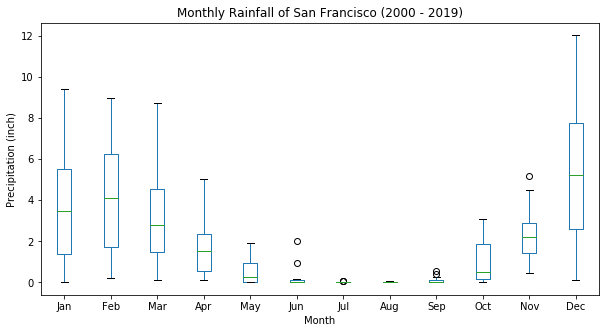

In [20]:
plt.figure(figsize = (10, 5))
sf_box = sf[months].boxplot(widths = 0.3, grid = False)
plt.xlabel('Month')
plt.ylabel('Precipitation (inch)')
plt.title('Monthly Rainfall of San Francisco (2000 - 2019)')
plt.show()

You can see it is quite easy to make the plot. What if we want to plot the data of Sacramento side by side. This becomes a fairly complex task for wide data. As you can see in the below, we have to plot the two dataframes separately, specify the width and position of each dataframe (otherwise they will overlap), and place the xticks at the center of two boxes. There is some tweeking involved to make it look right.